# Step 1: Load Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load the dataset
file_path = 'datasets/cleaned_lyrics_dataset.csv'
data = pd.read_csv(file_path)

# Inspect the dataset
print(data.head())
print(data.info())



  Genre                                        Title               Artist  \
0  Jazz  It's Beginning to Look a Lot like Christmas        Michael Bublé   
1  Jazz                        Holly Jolly Christmas        Michael Bublé   
2  Jazz               Christmas Time Is Here - Vocal  Vince Guaraldi Trio   
3  Jazz                        Holly Jolly Christmas        Michael Bublé   
4  Jazz                Santa Claus Is Coming to Town        Michael Bublé   

                                              Lyrics  
0  [Verse 1]\nIt's beginning to look a lot like C...  
1  Have a holly, jolly Christmas\nIt's the best t...  
2  "Jingle Bells" - Duke Ellington\n"When There's...  
3  Have a holly, jolly Christmas\nIt's the best t...  
4  You better watch out\nYou better not cry\nYou ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5470 entries, 0 to 5469
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   5470 non-null   

# Step 2: Preprocess Dataset

# Filter relevant columns
# Assume the dataset has columns like 'genre', 'lyrics', 'title', etc.
data = data[['genre', 'lyrics']]

# Drop rows with missing values
data.dropna(subset=['genre', 'lyrics'], inplace=True)

# Lowercase the lyrics for consistency
data['lyrics'] = data['lyrics'].str.lower()

# Inspect unique genres
print(data['genre'].unique())


# Step 3: Select Genre and Theme

In [4]:
# Select lyrics by genre
selected_genre = 'Pop'  # Example genre
theme = 'love'  # Example theme or word

# Filter dataset by genre
genre_data = data[data['Genre'] == selected_genre]

# Combine all lyrics in the genre
genre_text = " ".join(genre_data['Lyrics'].tolist())


# Step 4: Set Up GPT-2 Model

In [5]:
# Load pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Adjust model settings for lyric generation
model.eval()


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

# Step 5: Generate Lyrics

In [18]:
pip install transformers pandas torch scikit-learn nltk wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [19]:
def generate_lyrics(prompt, max_length=1500, temperature=0.7):
    """
    Generate lyrics based on a given prompt using GPT-2.
    """
    inputs = tokenizer.encode(prompt, return_tensors="pt")
    outputs = model.generate(
        inputs,
        max_length=max_length,
        temperature=temperature,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        top_k=50,
        top_p=0.95,
        pad_token_id=tokenizer.eos_token_id
    )
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text

# Use the theme as a prompt
prompt = f"{theme} in {selected_genre} music: "
generated_lyrics = generate_lyrics(prompt)
print("Generated Lyrics:\n", generated_lyrics)


/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Generated Lyrics:
 love in Pop music:  "I'm not a fan of the 'I' word, but I'm a big fan."
"The 'C' is a word that's been around for a long time, and I think it's a good word for 'cute' and 'dude.'"
The word "cutesy" is used in a number of contexts, including in the context of "dudes" and "girls." The word is also used to describe a person who is not very good at math or science.
In the past, the word has been used as a way to refer to a "good" person. In the present, it is more common to use the "I" word.


# Step 6: Save Results and Report

In [20]:
# Save generated lyrics to a file
output_file = 'generated_lyrics.txt'
with open(output_file, 'w') as file:
    file.write(f"Genre: {selected_genre}\n")
    file.write(f"Theme: {theme}\n")
    file.write(f"Generated Lyrics:\n{generated_lyrics}\n")


Optional: Visualization and Analysis
You can visualize genre distributions or analyze the generated lyrics:

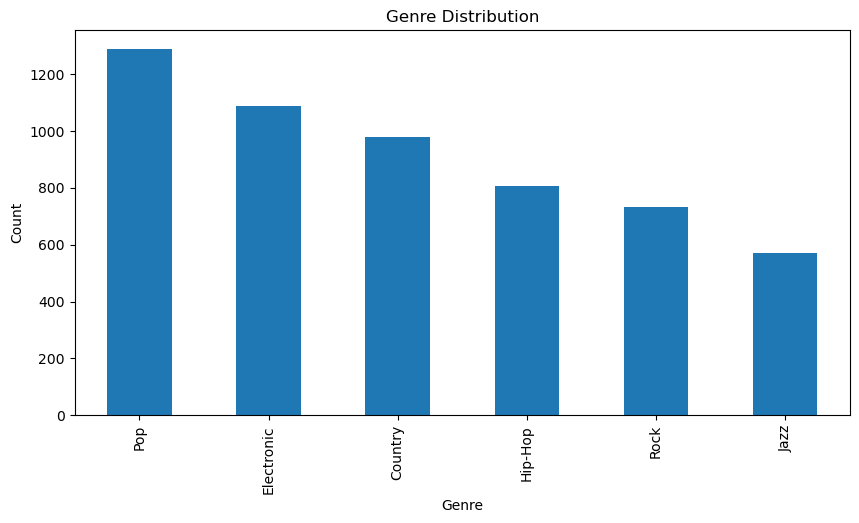

In [21]:
import matplotlib.pyplot as plt

# Genre distribution
genre_counts = data['Genre'].value_counts()
plt.figure(figsize=(10, 5))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


# Step 1: Improved Prompt Engineering

In [13]:
def generate_lyrics_enhanced(genre, theme, max_length=100, temperature=0.7):
    """
    Generate lyrics based on a given genre and theme using GPT-2.
    """
    prompt = f"Write a song in the {genre} genre about {theme}. Here's the first line: "
    inputs = tokenizer.encode(prompt, return_tensors="pt")
    outputs = model.generate(
        inputs,
        max_length=max_length,
        temperature=temperature,
        top_k=50,
        top_p=0.95,
        no_repeat_ngram_size=2,
        pad_token_id=tokenizer.eos_token_id,
        num_return_sequences=1
    )
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text

# Example usage
genre = "Pop"
theme = "love"
generated_lyrics = generate_lyrics_enhanced(genre, theme)
print("Generated Lyrics:\n", generated_lyrics)


/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Generated Lyrics:
 Write a song in the Pop genre about love. Here's the first line:  "I love you, but I don't know how to love myself."
I'm not sure if this is a good idea, or if it's just a way to get people to think about the song. I'm sure it would be a great idea to have a line like this, and I think it could be used to make a point about how much love we have for each other.
The


# Step 2: Thematic Filtering
To ensure the generated lyrics align with the theme, use cosine similarity with embeddings.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def filter_lyrics_thematically(generated_lyrics, theme):
    """
    Filter the generated lyrics by calculating similarity with the theme.
    """
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([generated_lyrics, theme])
    similarity = cosine_similarity(vectors[0], vectors[1])[0][0]
    return similarity

# Example usage
theme_similarity = filter_lyrics_thematically(generated_lyrics, theme)
print("Theme Similarity Score:", theme_similarity)
if theme_similarity > 0.5:
    print("Lyrics are relevant to the theme.")
else:
    print("Lyrics may not be relevant to the theme.")


Theme Similarity Score: 0.24131066062799372
Lyrics may not be relevant to the theme.


# Step 3: Evaluation Metrics
Evaluate the quality of the generated lyrics.

In [15]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction

def evaluate_lyrics(reference, generated):
    """
    Evaluate the generated lyrics using BLEU score.
    """
    reference_tokens = [reference.split()]
    generated_tokens = generated.split()
    smooth = SmoothingFunction().method4
    bleu_score = sentence_bleu(reference_tokens, generated_tokens, smoothing_function=smooth)
    return bleu_score

# Example usage
reference = "I want to hold your hand and dance under the stars."
bleu_score = evaluate_lyrics(reference, generated_lyrics)
print("BLEU Score:", bleu_score)


BLEU Score: 0.005650346101207478


# Step 4: Interactive Visualization with Word Cloud
Generate a word cloud to analyze word prominence in the generated lyrics.

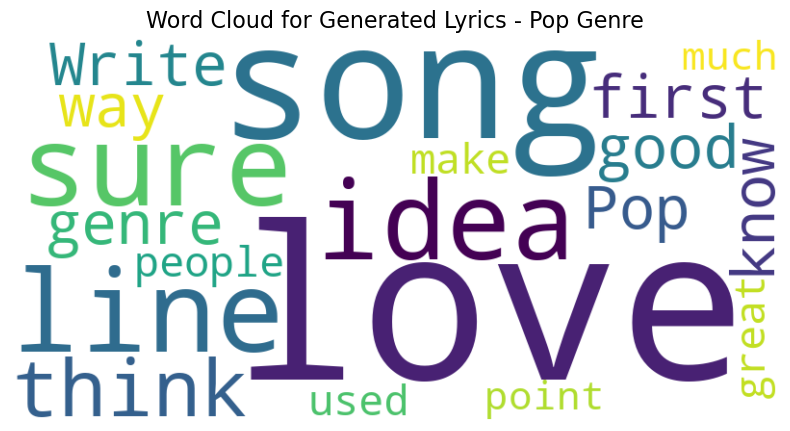

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def visualize_wordcloud(text, title):
    """
    Generate and display a word cloud.
    """
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.show()

# Example usage
visualize_wordcloud(generated_lyrics, title=f"Word Cloud for Generated Lyrics - {genre} Genre")


# Step 5: Save Improved Results
Save the generated lyrics and evaluation metrics for reporting.

In [17]:
output_file = 'improved_generated_lyrics.txt'
with open(output_file, 'w') as file:
    file.write(f"Genre: {genre}\n")
    file.write(f"Theme: {theme}\n")
    file.write(f"Generated Lyrics:\n{generated_lyrics}\n")
    file.write(f"Theme Similarity Score: {theme_similarity}\n")
    file.write(f"BLEU Score: {bleu_score}\n")
print(f"Results saved to {output_file}")


Results saved to improved_generated_lyrics.txt
